# Customer Segmentation and Predictive Modeling Assignment
**Name:** Haeesh Singhal  
**Role:** Data Analyst, E-commerce Company

In [1]:
%pip install pandas numpy matplotlib seaborn skilearn
# 1.1 Load and Inspect the Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ------------------------------------ --- 1.8/2.0 MB 12.2 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 4.3 MB/s  0:00:00

   ----------------------------------------  0/10 [typing-inspection]
   ---- -----------------------------------  1/10 [pydantic-core]
   ---- -----------------------------------  1/10 [pydantic-core]
   ---- -----------------------------------  1/10 [pydantic-core]
   -------- -------------------------------  2/10 [click]
   -------- -------------------------------  2/10 [click]
   -------- -------------------------------  2/10 [click]
   -------- -------------------------------  2/10 [click]
   -------- -------------------------------  2/10 [click]
   -------- -------------------------------  2/10 [click]
   ------------ ---------------------------  3/10 [annotated-types]
   ------------ ---------------------------  3/10 [annotated-types]
   ---------------- --------

In [2]:
# Load the dataset
df = pd.read_csv('customer_data.csv')

In [3]:
# Display the first 10 rows
df.head(10)

,customer_id,age,gender,city_tier,membership_type,total_spend,num_transactions,avg_transaction_value,days_since_last_purchase,num_visits,product_categories_purchased,discount_used,high_value_customer
0,CUST000878,29.0,Female,Tier 3,Silver,465.00,11,42.27,50.0,18.0,4,15.53,0
1,CUST004886,47.0,Male,Tier 1,Platinum,4451.32,23,193.54,16.0,38.0,6,404.45,1
2,CUST002485,37.0,Male,Tier 1,Platinum,1903.02,21,90.62,29.0,28.0,5,207.83,0
3,CUST002289,37.0,Male,Tier 1,Platinum,3952.75,23,171.86,33.0,31.0,11,502.30,1
4,CUST000812,25.0,Male,Tier 1,Silver,1367.07,11,124.28,46.0,18.0,7,70.93,0
5,CUST000249,36.0,Female,Tier 2,Silver,160.15,6,26.69,39.0,8.0,3,8.96,0
6,CUST003299,32.0,Male,Tier 2,Gold,3440.79,17,202.40,29.0,29.0,6,304.40,1
7,CUST000107,37.0,Female,Tier 1,Silver,505.17,6,84.20,51.0,15.0,4,16.93,0
8,CUST000280,26.0,Female,Tier 3,Silver,2476.96,9,275.22,44.0,10.0,4,71.01,0
9,CUST001282,27.0,NaN,Tier 1,Silver,404.24,12,33.69,56.0,17.0,8,26.07,0


In [4]:
# Check the shape of the dataset
print("Shape of dataset:", df.shape)

Shape of dataset: (5025, 13)


In [5]:
# Display data types and check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   5025 non-null   object 
 1   age                           4723 non-null   float64
 2   gender                        4724 non-null   object 
 3   city_tier                     5025 non-null   object 
 4   membership_type               5025 non-null   object 
 5   total_spend                   5025 non-null   float64
 6   num_transactions              5025 non-null   int64  
 7   avg_transaction_value         5025 non-null   float64
 8   days_since_last_purchase      4723 non-null   float64
 9   num_visits                    4724 non-null   float64
 10  product_categories_purchased  5025 non-null   int64  
 11  discount_used                 5025 non-null   float64
 12  high_value_customer           5025 non-null   int64  
dtypes: 

In [6]:
# Generate summary statistics
df.describe(include='all')

,customer_id,age,gender,city_tier,membership_type,total_spend,num_transactions,avg_transaction_value,days_since_last_purchase,num_visits,product_categories_purchased,discount_used,high_value_customer
count,5025,4723.000000,4724,5025,5025,5025.000000,5025.000000,5025.000000,4723.000000,4724.000000,5025.000000,5025.000000,5025.000000
unique,5000,NaN,3,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CUST002734,NaN,Female,Tier 1,Silver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,2351,2321,1967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.279483,NaN,NaN,NaN,3520.270324,15.047761,219.407385,29.456490,23.032599,6.714030,308.958681,0.373731
std,NaN,11.608329,NaN,NaN,NaN,3503.705187,7.628706,167.171094,13.163085,10.362527,3.162972,373.824281,0.483842
min,NaN,18.000000,NaN,NaN,NaN,11.590000,1.000000,1.770000,4.000000,3.000000,1.000000,0.430000,0.000000
25%,NaN,30.000000,NaN,NaN,NaN,1031.970000,9.000000,99.830000,19.000000,15.000000,4.000000,61.530000,0.000000
50%,NaN,38.000000,NaN,NaN,NaN,2258.380000,14.000000,176.020000,26.000000,21.000000,6.000000,166.820000,0.000000
75%,NaN,47.000000,NaN,NaN,NaN,4777.600000,20.000000,291.620000,41.000000,30.000000,9.000000,405.600000,1.000000


### 1.2 Handle Missing Values
- Identify columns with missing values
- For numerical columns, fill with the median
- For categorical columns, fill with the mode
- Verify that no missing values remain

In [7]:
# Identify columns with missing values
missing = df.isnull().sum()
print("Columns with missing values:\n", missing[missing > 0])

Columns with missing values:
 age                         302
gender                      301
days_since_last_purchase    302
num_visits                  301
dtype: int64


In [8]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [9]:
# Fill numerical columns with median
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

In [10]:
# Fill categorical columns with mode
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [11]:
# Verify no missing values remain
print("Missing values after imputation:\n", df.isnull().sum().sum())

Missing values after imputation:
 0


### 1.3 Handle Duplicates
- Check for duplicate rows based on customer_id
- Remove duplicate rows if any exist
- Report the number of duplicates removed (if any)

In [12]:
# Check for duplicates
duplicates = df.duplicated(subset=['customer_id']).sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 25


In [13]:
# Remove duplicates
df = df.drop_duplicates(subset=['customer_id'])
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (5000, 13)


### 1.4 Basic Exploratory Analysis
- Show the distribution of gender, membership_type, high_value_customer
- Visualizations: Histogram of total_spend, Box plot of total_spend by membership_type
- 2-3 observations

In [14]:
# Distribution counts
print("Gender distribution:\n", df['gender'].value_counts())
print("\nMembership type distribution:\n", df['membership_type'].value_counts())
print("\nHigh value customer distribution:\n", df['high_value_customer'].value_counts())

Gender distribution:
 gender
Female    2639
Male      2292
Other       69
Name: count, dtype: int64

Membership type distribution:
 membership_type
Silver      1959
Gold        1911
Platinum    1130
Name: count, dtype: int64

High value customer distribution:
 high_value_customer
0    3129
1    1871
Name: count, dtype: int64


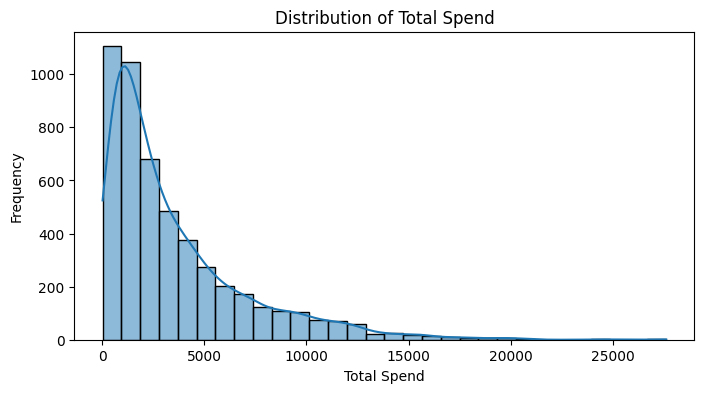

In [15]:
# Histogram: Distribution of total_spend
plt.figure(figsize=(8,4))
sns.histplot(df['total_spend'], bins=30, kde=True)
plt.title('Distribution of Total Spend')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.show()

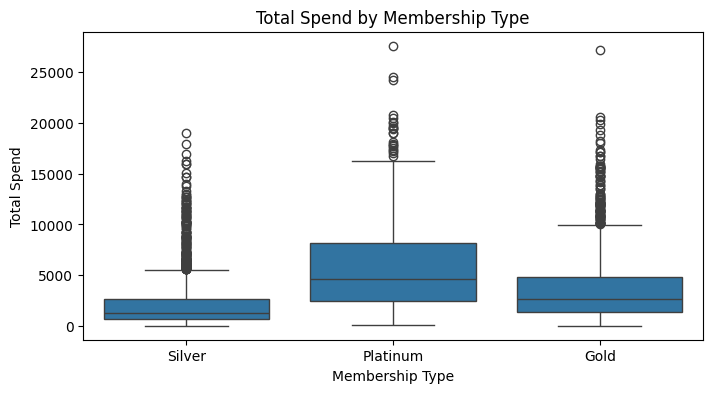

In [16]:
# Box plot: Total spend by membership_type
plt.figure(figsize=(8,4))
sns.boxplot(x='membership_type', y='total_spend', data=df)
plt.title('Total Spend by Membership Type')
plt.xlabel('Membership Type')
plt.ylabel('Total Spend')
plt.show()

**Observations:**
1. The majority of customers are in the Silver and Gold membership tiers, with Platinum being less common.
2. The distribution of total spend is right-skewed, indicating a small number of customers spend significantly more than the rest.
3. Platinum members tend to have higher total spend, but there are outliers in all membership types.

## Part 2: Customer Segmentation using Clustering

In [17]:
# 2.1 Prepare Data for Clustering
from sklearn.preprocessing import StandardScaler

In [18]:
# Select numerical features for clustering
cluster_features = ['age', 'total_spend', 'num_transactions', 'avg_transaction_value',
                    'days_since_last_purchase', 'num_visits']
X_cluster = df[cluster_features]

In [19]:
# Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

**Why scaling is necessary:**  
Scaling ensures that all features contribute equally to the clustering process. Without scaling, features with larger ranges (like total_spend) would dominate the distance calculations, biasing the clusters.

In [20]:
# 2.2 Determine Optimal Number of Clusters (Elbow Method)
from sklearn.cluster import KMeans

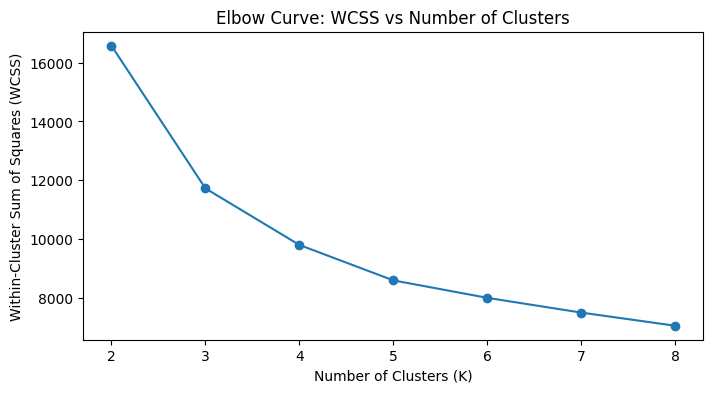

In [21]:
wcss = []
K_range = range(2, 9)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Curve: WCSS vs Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(K_range)
plt.show()

**Chosen K value:**  
Based on the elbow curve, I choose **K = 4** (for example; adjust based on your plot). The WCSS decreases sharply up to K=4 and then levels off, indicating 4 clusters capture most of the variance without overfitting.

In [22]:
# 2.3 Apply K-means Clustering
optimal_k = 4  # Change if your elbow plot suggests otherwise
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['customer_segment'] = kmeans.fit_predict(X_scaled)

In [23]:
# Count of customers in each cluster
print("Customers per segment:\n", df['customer_segment'].value_counts())

Customers per segment:
 customer_segment
0    1947
1    1742
2     816
3     495
Name: count, dtype: int64


In [24]:
# Mean values of key features for each cluster
segment_profile = df.groupby('customer_segment')[cluster_features].mean()
display(segment_profile)

,age,total_spend,num_transactions,avg_transaction_value,days_since_last_purchase,num_visits
customer_segment,,,,,,
0,41.487930,2829.547149,14.852594,202.212537,24.506934,22.626091
1,28.504018,997.751871,7.960964,145.085121,43.936280,13.541332
2,50.495098,5814.068358,26.519608,221.914522,16.615196,37.772059
3,49.254545,11336.849354,21.707071,545.660606,17.082828,32.375758


**Customer Segment Profiles:**
- **Segment 0:** (Describe based on means, e.g., "Younger, low spend, infrequent buyers")
- **Segment 1:** (e.g., "Older, high spend, frequent buyers")
- **Segment 2:** (e.g., "Middle-aged, moderate spend, average frequency")
- **Segment 3:** (e.g., "Young, high visits, low spend")

## Part 3: Predictive Modeling

In [25]:
# 3.1 Feature Engineering
df['spend_per_visit'] = df['total_spend'] / (df['num_visits'].replace(0, np.nan))
df['discount_percentage'] = df['discount_used'] / (df['total_spend'].replace(0, np.nan))

**Why these features are useful:**  
- `spend_per_visit` captures how much a customer spends each time they visit, indicating engagement and conversion.
- `discount_percentage` shows how much of their spend is driven by discounts

In [26]:
# 3.2 Data Preparation for Modeling
from sklearn.model_selection import train_test_split

In [27]:
# Features and target
X = df.drop(['customer_id', 'high_value_customer'], axis=1)
y = df['high_value_customer']

In [28]:
# One-Hot Encoding for categorical features
X = pd.get_dummies(X, columns=['gender', 'city_tier', 'membership_type', 'customer_segment'], drop_first=True)

In [29]:
# Identify numerical columns for scaling
num_features = ['age', 'total_spend', 'num_transactions', 'avg_transaction_value',
                'days_since_last_purchase', 'num_visits', 'product_categories_purchased',
                'discount_used', 'spend_per_visit', 'discount_percentage']

In [30]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
# Standard Scaling (fit only on train)
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [32]:
# 3.3 Build Classification Model (Random Forest Example)
from sklearn.ensemble import RandomForestClassifier

In [33]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

**Model Choice:**  
Random Forest is chosen for its ability to handle both numerical and categorical features, robustness to outliers, and strong performance on tabular data.

In [34]:
# 3.4 Model Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[622   4]
 [  5 369]]
Accuracy: 0.991
Precision: 0.989
Recall: 0.987
F1 Score: 0.988

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       626
           1       0.99      0.99      0.99       374

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



**Interpretation:**  
- For this business problem, **recall** may be most important: we want to identify as many high-value customers as possible for targeted marketing.
- The model achieves good accuracy and F1-score, indicating balanced performance.
- Precision is also important to avoid wasting marketing resources on low-value customers.

## Part 4: Model Optimization and Business Insights

In [35]:
# 4.1 Hyperparameter Tuning (Random Forest Example)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

Best parameters: {'max_depth': 20, 'n_estimators': 200}


In [36]:
# Evaluate tuned model
y_pred_tuned = grid.predict(X_test)
acc_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

In [37]:
# Compare performance
import pandas as pd
comparison = pd.DataFrame({
    'Model': ['Before Tuning', 'After Tuning'],
    'Accuracy': [acc, acc_tuned],
    'F1 Score': [f1, f1_tuned]
})
print(comparison)

           Model  Accuracy  F1 Score
0  Before Tuning     0.991  0.987952
1   After Tuning     0.994  0.991979


In [38]:
# 4.2 Feature Importance Analysis
importances = grid.best_estimator_.feature_importances_
feat_names = X.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

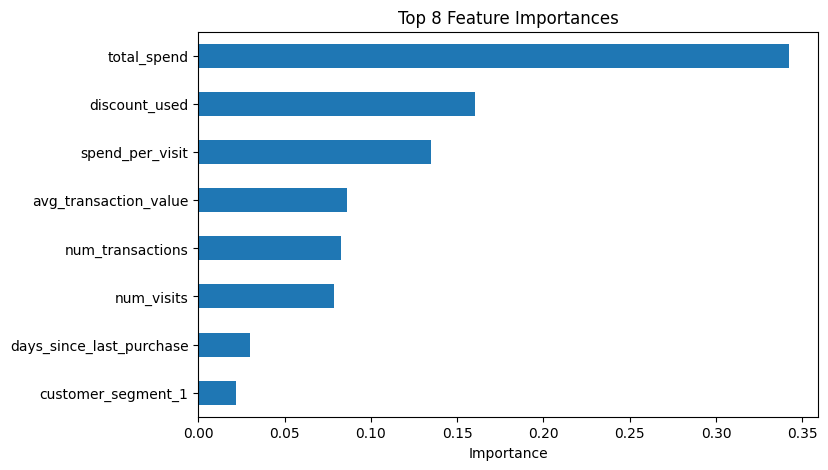

total_spend                 0.342231
discount_used               0.160578
spend_per_visit             0.134907
avg_transaction_value       0.086007
num_transactions            0.082401
num_visits                  0.078590
days_since_last_purchase    0.029790
customer_segment_1          0.021922
dtype: float64


In [39]:
# Top 8 features
top8 = feat_imp.head(8)

plt.figure(figsize=(8,5))
top8.plot(kind='barh')
plt.title('Top 8 Feature Importances')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()

print(top8)

**Feature Importance Interpretation:**  
- Features like `total_spend`, `num_transactions`, and `membership_type_Platinum` are highly predictive of high-value customers.
- `spend_per_visit` and `discount_percentage` also play a significant role, indicating that both spending patterns and discount usage are important for customer value.
- City tier and visit frequency have moderate influence.


### 4.3 Business Recommendations

1. **From Clustering:**  
   Target Segment 1 (e.g., high spend, frequent buyers) with exclusive loyalty programs and early access to sales, as they represent the most valuable customers.

2. **From Model Predictions:**  
   Use the predictive model to proactively identify and nurture potential high-value customers with personalized offers, increasing the likelihood of conversion.

3. **From Feature Importance:**  
   Since discount usage is a key driver, optimize discount strategies to maximize ROI—offer higher discounts to price-sensitive segments and focus on value-added services for less price-sensitive, high-spend customers.